In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import time 

In [2]:
data = pd.read_csv("data/data-final_nosso_big5.csv", sep= '\t')

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


### Get some first info about the dataframe

In [4]:
data.shape

(1015341, 110)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


### Check for missing values

In [6]:
for i in data.columns: 
    print(i, data[i].isna().sum())

EXT1 1783
EXT2 1783
EXT3 1783
EXT4 1783
EXT5 1783
EXT6 1783
EXT7 1783
EXT8 1783
EXT9 1783
EXT10 1783
EST1 1783
EST2 1783
EST3 1783
EST4 1783
EST5 1783
EST6 1783
EST7 1783
EST8 1783
EST9 1783
EST10 1783
AGR1 1783
AGR2 1783
AGR3 1783
AGR4 1783
AGR5 1783
AGR6 1783
AGR7 1783
AGR8 1783
AGR9 1783
AGR10 1783
CSN1 1783
CSN2 1783
CSN3 1783
CSN4 1783
CSN5 1783
CSN6 1783
CSN7 1783
CSN8 1783
CSN9 1783
CSN10 1783
OPN1 1783
OPN2 1783
OPN3 1783
OPN4 1783
OPN5 1783
OPN6 1783
OPN7 1783
OPN8 1783
OPN9 1783
OPN10 1783
EXT1_E 1783
EXT2_E 1783
EXT3_E 1783
EXT4_E 1783
EXT5_E 1783
EXT6_E 1783
EXT7_E 1783
EXT8_E 1783
EXT9_E 1783
EXT10_E 1783
EST1_E 1783
EST2_E 1783
EST3_E 1783
EST4_E 1783
EST5_E 1783
EST6_E 1783
EST7_E 1783
EST8_E 1783
EST9_E 1783
EST10_E 1783
AGR1_E 1783
AGR2_E 1783
AGR3_E 1783
AGR4_E 1783
AGR5_E 1783
AGR6_E 1783
AGR7_E 1783
AGR8_E 1783
AGR9_E 1783
AGR10_E 1783
CSN1_E 1783
CSN2_E 1783
CSN3_E 1783
CSN4_E 1783
CSN5_E 1783
CSN6_E 1783
CSN7_E 1783
CSN8_E 1783
CSN9_E 1783
CSN10_E 1783
OPN1_E 1783

In [7]:
for i in data:
    if isinstance(data[i][2], str): continue
    data[i].fillna(data[i].median(),inplace=True)

In [8]:
# check again for missing values
for i in data.columns: 
    print(i, data[i].isna().sum())

EXT1 0
EXT2 0
EXT3 0
EXT4 0
EXT5 0
EXT6 0
EXT7 0
EXT8 0
EXT9 0
EXT10 0
EST1 0
EST2 0
EST3 0
EST4 0
EST5 0
EST6 0
EST7 0
EST8 0
EST9 0
EST10 0
AGR1 0
AGR2 0
AGR3 0
AGR4 0
AGR5 0
AGR6 0
AGR7 0
AGR8 0
AGR9 0
AGR10 0
CSN1 0
CSN2 0
CSN3 0
CSN4 0
CSN5 0
CSN6 0
CSN7 0
CSN8 0
CSN9 0
CSN10 0
OPN1 0
OPN2 0
OPN3 0
OPN4 0
OPN5 0
OPN6 0
OPN7 0
OPN8 0
OPN9 0
OPN10 0
EXT1_E 0
EXT2_E 0
EXT3_E 0
EXT4_E 0
EXT5_E 0
EXT6_E 0
EXT7_E 0
EXT8_E 0
EXT9_E 0
EXT10_E 0
EST1_E 0
EST2_E 0
EST3_E 0
EST4_E 0
EST5_E 0
EST6_E 0
EST7_E 0
EST8_E 0
EST9_E 0
EST10_E 0
AGR1_E 0
AGR2_E 0
AGR3_E 0
AGR4_E 0
AGR5_E 0
AGR6_E 0
AGR7_E 0
AGR8_E 0
AGR9_E 0
AGR10_E 0
CSN1_E 0
CSN2_E 0
CSN3_E 0
CSN4_E 0
CSN5_E 0
CSN6_E 0
CSN7_E 0
CSN8_E 0
CSN9_E 0
CSN10_E 0
OPN1_E 0
OPN2_E 0
OPN3_E 0
OPN4_E 0
OPN5_E 0
OPN6_E 0
OPN7_E 0
OPN8_E 0
OPN9_E 0
OPN10_E 0
dateload 0
screenw 0
screenh 0
introelapse 0
testelapse 0
endelapse 0
IPC 0
country 77
lat_appx_lots_of_err 0
long_appx_lots_of_err 0


In [9]:
data_clean = data.dropna()
data_clean.isna().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64

In [10]:
X = data_clean.iloc[: , :100]
countries = data_clean["country"].tolist()
countries

['GB',
 'MY',
 'GB',
 'GB',
 'KE',
 'SE',
 'US',
 'MY',
 'GB',
 'FI',
 'UA',
 'PH',
 'FR',
 'GB',
 'AU',
 'IN',
 'CA',
 'NL',
 'ZA',
 'HK',
 'GB',
 'US',
 'GB',
 'BR',
 'AU',
 'CA',
 'GB',
 'AU',
 'GB',
 'GB',
 'SE',
 'CH',
 'FR',
 'FR',
 'GB',
 'GB',
 'TH',
 'GB',
 'GB',
 'GB',
 'IT',
 'AU',
 'FR',
 'IN',
 'ES',
 'IN',
 'FR',
 'IN',
 'FR',
 'AE',
 'HR',
 'US',
 'GR',
 'IE',
 'IN',
 'GB',
 'BR',
 'GB',
 'IN',
 'GB',
 'OM',
 'GB',
 'KE',
 'AU',
 'ES',
 'FR',
 'GB',
 'GB',
 'PH',
 'HK',
 'PH',
 'US',
 'HK',
 'DE',
 'GB',
 'GB',
 'AU',
 'IN',
 'GB',
 'PT',
 'GB',
 'GB',
 'DE',
 'HK',
 'GB',
 'NL',
 'GB',
 'GB',
 'NL',
 'CA',
 'NL',
 'GB',
 'GB',
 'PH',
 'SG',
 'GB',
 'NONE',
 'GB',
 'GB',
 'GB',
 'US',
 'GB',
 'RO',
 'IN',
 'US',
 'GB',
 'IN',
 'GB',
 'CA',
 'GB',
 'GB',
 'NO',
 'GB',
 'US',
 'GB',
 'NL',
 'GB',
 'US',
 'BD',
 'BN',
 'GB',
 'IN',
 'CA',
 'GB',
 'IN',
 'AU',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'GB',
 'PH',
 'DE',
 'PH',
 'GB',
 'PH',
 'SE',
 'DE',
 'IN',
 'AU',
 'ZA',
 'NO

In [11]:
print(X.shape)
print(len(countries))

(1015264, 100)
1015264


In [17]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X)  # fit does nothing.

X = transformer.transform(X)

## First attempt to cluster the data with a given number of clusters. 
##### Then I check the clustering error with the inertia_ attribute.

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [20]:
inertia = kmeans.inertia_
print(inertia)

389247.400748191


## Cluster analysis 

#### Here the steps that are at the basis of a simple cluster analysis. 

- First lets define a range where to vary the number of cluster say from 1 to 10. 


- Then, run the clustering algorithm for the given number of times 


- Plot the error (inertia) against the number of clusters used each time. 


- Use the elbow rule to determine the optimal number of clusters. 



In [31]:
start =  time.time()
print('Start computation time: ', start)
ks = range(1, 40)
in_s = []
for i in ks: 
    model = KMeans(n_clusters=i, random_state=0)
    model.fit_predict(X, countries)
    
    in_i = model.inertia_
    in_s.append(in_i)
    print(i, in_i)
print('End computation time: ', time.time() - start)    

Start computation time:  1644816590.5387714
1 422118.19726581936
2 389247.400748191
3 365215.71555357665
4 351093.0155562783
5 343862.8626336873
6 337508.202580675
7 331220.584025684
8 325345.6298070263
9 320049.4585158102
10 316925.00091842085
11 313248.97580712265
12 310112.491380671
13 305908.0004979591
14 303512.225414975
15 300772.606830107
16 297019.60536628845
17 294433.34033835423
18 291907.06016713544
19 289369.034983139
20 286331.0924794776
21 283975.5857451239
22 280612.87719325843
23 278752.7135447653
24 276842.6233321765
25 272588.4345836133
26 271582.90478387516
27 268529.4922108313
28 267187.01777774276
29 265619.76397109596
30 260626.99105029958
31 259570.38595876127
32 256547.1483634701
33 253293.4810129392
34 252993.35513712582
35 249385.81730446705
36 247766.17078180474
37 244982.43898005367
38 243081.47612218506
39 242127.9921372433
End computation time:  5239.1315331459045


In [32]:
in_s

[422118.19726581936,
 389247.400748191,
 365215.71555357665,
 351093.0155562783,
 343862.8626336873,
 337508.202580675,
 331220.584025684,
 325345.6298070263,
 320049.4585158102,
 316925.00091842085,
 313248.97580712265,
 310112.491380671,
 305908.0004979591,
 303512.225414975,
 300772.606830107,
 297019.60536628845,
 294433.34033835423,
 291907.06016713544,
 289369.034983139,
 286331.0924794776,
 283975.5857451239,
 280612.87719325843,
 278752.7135447653,
 276842.6233321765,
 272588.4345836133,
 271582.90478387516,
 268529.4922108313,
 267187.01777774276,
 265619.76397109596,
 260626.99105029958,
 259570.38595876127,
 256547.1483634701,
 253293.4810129392,
 252993.35513712582,
 249385.81730446705,
 247766.17078180474,
 244982.43898005367,
 243081.47612218506,
 242127.9921372433]

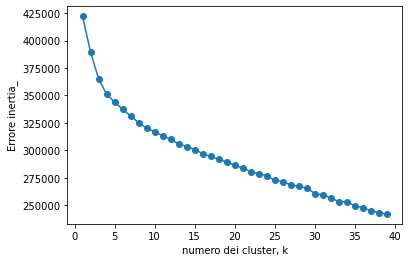

In [33]:
plt.plot(ks, in_s, '-o')
plt.xlabel("numero dei cluster, k")
plt.ylabel("Errore inertia_")
plt.show()

In [41]:
model2 = KMeans(n_clusters=4, random_state=0)

In [42]:
labels = model2.fit_predict(X)

In [43]:
df = pd.DataFrame({'labels':labels, 'countries':countries})

In [44]:
df

,labels,countries
0,2,GB
1,2,MY
2,2,GB
3,2,GB
4,2,KE
...,...,...
1015259,2,US
1015260,2,US
1015261,2,US
1015262,2,US


In [48]:
df['labels'].value_counts()

2    670289
3    150129
0    119406
1     75440
Name: labels, dtype: int64

In [49]:
ct = pd.crosstab(df['labels'], df['countries'])

In [50]:
ct

countries,AD,AE,AF,AG,AI,AL,AM,AO,AQ,AR,...,VG,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
labels,,,,,,,,,,,,,,,,,,,,,
0,2,503,5,0,0,69,24,2,0,553,...,0,8,383,0,3,0,3,307,4,11
1,0,266,7,2,1,33,7,1,0,287,...,0,1,215,0,0,0,2,283,8,13
2,12,1780,32,19,2,261,62,9,1,1923,...,2,33,1213,7,8,4,8,2708,74,61
3,3,512,10,3,1,73,16,2,1,391,...,1,10,526,0,0,3,1,453,12,18


In [53]:
print('C, c0, c1, c2, c3')
for i in ct.columns: 
    print(i, ct[i][0], ct[i][1], ct[i][2], ct[i][3] )   

C, c0, c1, c2, c3
AD 2 0 12 3
AE 503 266 1780 512
AF 5 7 32 10
AG 0 2 19 3
AI 0 1 2 1
AL 69 33 261 73
AM 24 7 62 16
AO 2 1 9 2
AQ 0 0 1 1
AR 553 287 1923 391
AS 1 2 5 1
AT 567 142 1243 263
AU 4614 3849 35009 6558
AW 4 3 23 4
AX 6 1 6 2
AZ 17 3 47 13
BA 99 47 340 64
BB 9 12 104 32
BD 52 29 181 57
BE 776 260 2329 459
BF 0 0 2 0
BG 261 101 745 164
BH 36 21 112 38
BI 0 0 0 1
BJ 0 0 2 0
BM 3 1 43 10
BN 40 25 155 27
BO 45 33 239 52
BQ 0 0 1 1
BR 1742 542 3050 911
BS 6 24 74 39
BT 1 1 10 2
BW 16 10 66 14
BY 30 15 95 26
BZ 18 14 83 37
CA 6655 4341 41595 9258
CD 0 0 3 0
CG 0 0 2 1
CH 689 239 1846 350
CI 4 0 8 1
CK 1 0 6 1
CL 373 191 1296 333
CM 5 1 24 3
CN 180 183 706 271
CO 516 439 2046 618
CR 100 54 391 105
CU 3 4 12 6
CV 1 1 9 0
CW 6 1 37 6
CY 59 21 186 45
CZ 410 154 1127 323
DE 3565 949 7898 1683
DJ 1 0 1 0
DK 1062 393 3387 670
DM 1 0 8 4
DO 55 35 198 71
DZ 62 30 115 32
EC 158 138 666 184
EE 213 77 586 144
EG 215 115 490 213
ES 1076 342 2901 689
ET 57 38 120 62
FI 901 269 2572 598
FJ 2 2 44